# Lab1 - Supervised Machine Learning 

In this lab, you will practice using sklearn and statsmodel package to fit machine learning models for predictive and explainatory purposes. 

## Machine Learning For Predictive Purposes
- KNN
- Logistic Regression 
- SVM
- Naive Bayes
- Decision Tree
- Random Forest 
- Gradient Boost

### Model Selection 
- Grid Search 
- General Ensembled Classifier

## Machine Learning For Explainatory Purposes 
- Linear / Logistic Regression 
- Permutation feature importance

In [54]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline 

### The Customer Churn Data Set 

This dataset is randomly collected from an Iranian telecom company database over a period of 12 months. 
A total of 3150 rows of data, each representing a customer, bear information for 13 columns. The attributes that are in this dataset are call failures, frequency of SMS, number of complaints, number of distinct calls, subscription length, age group, the charge amount, type of service, seconds of use, status, frequency of use, and Customer Value.

All of the attributes except for attribute churn is the aggregated data of the first 9 months. The churn labels are the state of the customers at the end of 12 months. The three months is the designated planning gap.

**Attribute Information:**

- Call Failures: number of call failures
- Complains: binary (0: No complaint, 1: complaint)
- Subscription Length: total months of subscription
- Charge Amount: Ordinal attribute (0: lowest amount, 9: highest amount)
- Seconds of Use: total seconds of calls
- Frequency of use: total number of calls
- Frequency of SMS: total number of text messages
- Distinct Called Numbers: total number of distinct phone calls
- Age Group: ordinal attribute (1: younger age, 5: older age)
- Tariff Plan: binary (1: Pay as you go, 2: contractual)
- Status: binary (1: active, 2: non-active)
- Customer Value: The calculated value of customer
- Churn (Y): binary (1: churn, 0: non-churn) - Class label

## Data Understanding 

In [102]:
data = pd.read_csv("/Users/jenysherchan/Downloads/customer_churn.csv")
data.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,145.805,0


In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Customer Value           3150 non-null   float64
 12  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 320.1 KB


In [106]:
## check missing values 
pd.isna(data).sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Customer Value             0
Churn                      0
dtype: int64

In [108]:
## check variable description 
data.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,2165.280000,1.000000


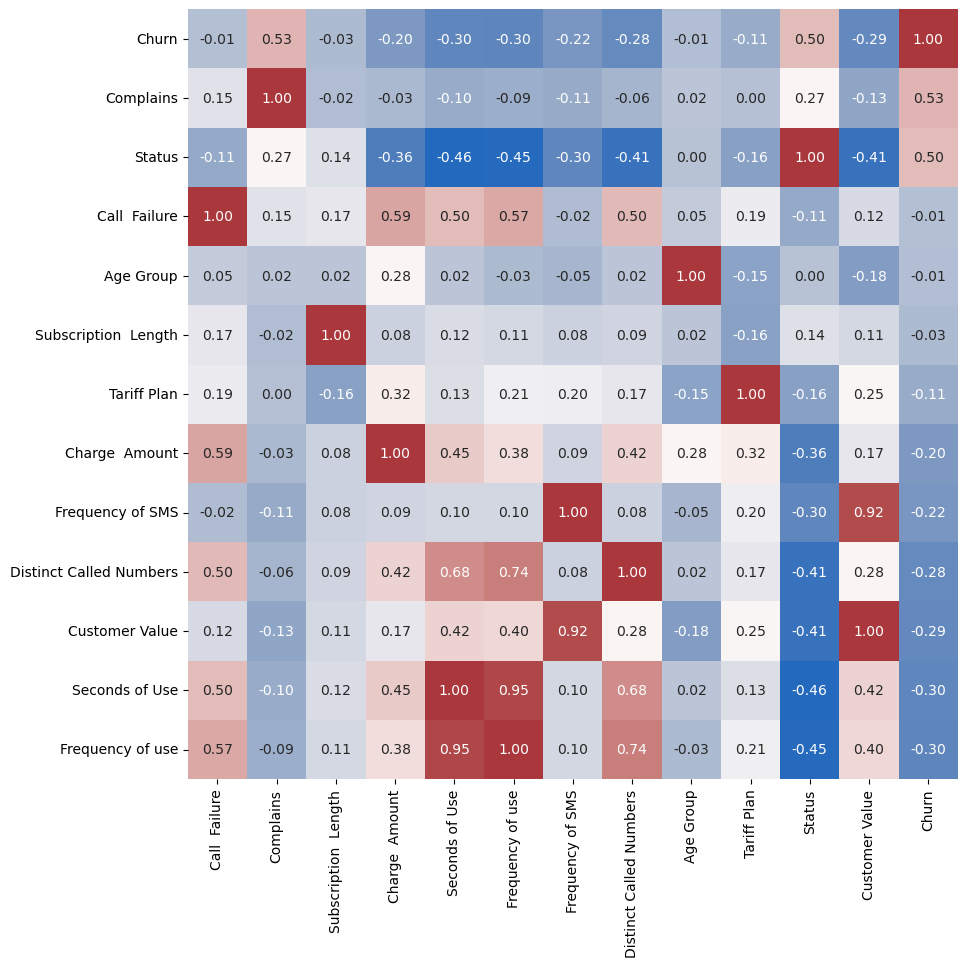

In [110]:
## check variable correlation 
corr_table = data.corr().sort_values("Churn", ascending=False)
plt.figure(figsize=(10,10))
ax = sns.heatmap(corr_table, cmap="vlag", annot=True, fmt='.2f', square=True, cbar=False)

## Practice 1
- How the Y variable ("Churn") was distributed? 
- What's that mean for our prediction?

Churn
0    0.842857
1    0.157143
Name: proportion, dtype: float64


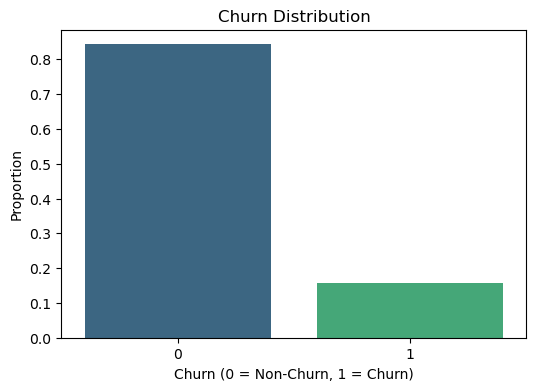

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the distribution of the 'Churn' variable
churn_distribution = data['Churn'].value_counts(normalize=True)

# Print the distribution
print(churn_distribution)

# Plot the distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=churn_distribution.index, y=churn_distribution.values, palette="viridis")
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = Non-Churn, 1 = Churn)')
plt.ylabel('Proportion')
plt.show()



## The Y variable churn

X-axis: Represents the Churn values (0 for non-churners, 1 for churners).
Y-axis: Represents the proportion of each class (0 and 1).
For example, if 85% of the customers didn't churn (Churn=0) and 15% churned (Churn=1), you would see a taller bar for Churn=0 and a shorter bar for Churn=1.

## Implications for prediction:
This is an imbalanced dataset because a large proportion of the data (84%) consists of non-churners. This means that if you were to build a machine learning model to predict churn, it may struggle to correctly identify churners due to this imbalance. The model might favor predicting "Non-Churn" more frequently just because there are more examples of it.

To address this, we might:
1. Resample the data: Either oversample the minority class (churners) or undersample the majority class (non-churners).
2. Use algorithms: Consider using algorithms like Random Forest or XGBoost, which handle imbalance better.
3. Use metrics like AUC-ROC or F1-score: Accuracy alone may not be a good evaluation metric due to the imbalance. These alternative metrics can provide better insights into how well the model handles both classes.

In [116]:
# Calculate the mean of the Churn variable
churn_mean = data['Churn'].mean()
print(f"The mean churn rate is: {churn_mean}")

The mean churn rate is: 0.15714285714285714


### The Mean Churn Rate

The mean churn rate can also serve as a baseline: any model you build should ideally perform better than just predicting "no churn" 
for every customer (which would get you an accuracy equal to 1 - churn_mean).



In [119]:
data.columns

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status',
       'Customer Value', 'Churn'],
      dtype='object')

In [121]:
## let's randomly select 200 observations as next year's customer data for later use (to demostrate how we may use the predictive model)

next_year_index = np.random.choice(data.index, size=200, replace=False)   # randomly sample 200 obs from index without replacement 
next_year = data.loc[next_year_index]

In [123]:
## the data used for prediction 

current_year_index = np.delete(data.index.values, next_year_index)
data2 = data.loc[current_year_index]

In [125]:
len(data), len(data2), len(next_year)

(3150, 2950, 200)

## Data Prepare 

In [128]:
features = ['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
            'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
            'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Customer Value']   # features / independent variables 
target = ['Churn']     # target / dependent variable 

# extract corresponding columns 
X = data2[features].values   
Y = data2[target].values.ravel()

In [130]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

- We could use the `train_test_split` (code as follow) process to properly evaluate our model, but the model's performance may vary based on how the dataset was "randomly" splited. So, here, we will use the `K-folder cross validation process` instead.  

```python
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
```

## Make Predictions

### KNN

In [135]:
from sklearn.model_selection import cross_validate     # import cross_validation function from sklearn
from sklearn.neighbors import KNeighborsClassifier    # import KNN classifer 

knn = KNeighborsClassifier()

## fit with 5 folder cross validation 

scores = cross_validate(estimator=knn, X=X, y=Y, cv=5, scoring="accuracy")

print("Average Fitting Time:", scores['fit_time'].mean())
print("Average Accuracy:", scores['test_score'].mean())

Average Fitting Time: 0.0007784843444824218
Average Accuracy: 0.9477966101694915


### Logistic Regression 

In [138]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

scores = cross_validate(estimator=lr, X=X, y=Y, cv=5, scoring="accuracy")

print("Average Fitting Time:", scores['fit_time'].mean())
print("Average Accuracy:", scores['test_score'].mean())

Average Fitting Time: 0.06218042373657227
Average Accuracy: 0.8908474576271186


### SVM 

In [141]:
from sklearn.svm import SVC

svm = SVC()

scores = cross_validate(estimator=svm, X=X, y=Y, cv=5, scoring="accuracy")

print("Average Fitting Time:", scores['fit_time'].mean())
print("Average Accuracy:", scores['test_score'].mean())

Average Fitting Time: 0.02375617027282715
Average Accuracy: 0.9264406779661016


### Naive Bayes 

In [144]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

scores = cross_validate(estimator=nb, X=X, y=Y, cv=5, scoring="accuracy")

print("Average Fitting Time:", scores['fit_time'].mean())
print("Average Accuracy:", scores['test_score'].mean())

Average Fitting Time: 0.0006251335144042969
Average Accuracy: 0.7261016949152543


## Practice 2: 
- Fit a Decision Tree Classifier and a Random Forest Classifier with the current data using cross validation. 

### Decision Tree

In [148]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

## your code here 
tree = DecisionTreeClassifier()
tree_scores = cross_validate(estimator=tree, X=X, y=Y, cv=5, scoring="accuracy")
print("Decision Tree - Average Fitting Time:", tree_scores['fit_time'].mean())
print("Decision Tree - Average Accuracy:", tree_scores['test_score'].mean())

Decision Tree - Average Fitting Time: 0.0070096015930175785
Decision Tree - Average Accuracy: 0.936949152542373


# Decision Tree
The tree starts with a root node and splits the data based on the most informative feature (the one that best separates churners from non-churners).
It continues splitting the data at each level based on other features until it reaches a leaf node where it makes a final prediction (churn or no churn).


### Random Forest

In [152]:
from sklearn.ensemble import RandomForestClassifier

## your code here

# Random Forest
rf = RandomForestClassifier()
rf_scores = cross_validate(estimator=rf, X=X, y=Y, cv=5, scoring="accuracy")
print("Random Forest - Average Fitting Time:", rf_scores['fit_time'].mean())
print("Random Forest - Average Accuracy:", rf_scores['test_score'].mean())


Random Forest - Average Fitting Time: 0.1397693157196045
Random Forest - Average Accuracy: 0.9532203389830508


# Random Forest Classifier
Each tree votes on the class (churn or non-churn), and the majority vote becomes the final prediction.
Decision Tree Classifier: Simple, interpretable, but prone to overfitting.
Random Forest Classifier: More complex, less prone to overfitting, generally more accurate because it combines many decision trees.
Cross-validation: Used to ensure the model performs well on different subsets of the data.



### Gradient Boost Classifier 

In [156]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

scores = cross_validate(estimator=gb, X=X, y=Y, cv=5, scoring="accuracy")

print("Average Fitting Time:", scores['fit_time'].mean())
print("Average Accuracy:", scores['test_score'].mean())

Average Fitting Time: 0.26334662437438966
Average Accuracy: 0.944406779661017


## Model Selection 

We can write a loop to search for the best model for the problem. 

In [160]:
## candidate models 
knn = KNeighborsClassifier()
lr = LogisticRegression()
svm = SVC()
nb = GaussianNB()
tree = DecisionTreeClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()

models = {"KNN": knn, "LogisticRegression": lr, "SVM": svm, 
          "Naive Bayes": nb, "DecisionTree": tree, "RandomForest": rf, "GradientBoost":gb}
results = []

for model_name, model in models.items():
    default = {"Model":model_name, "Fitting Time": np.nan, "Accuracy": np.nan}
    scores = cross_validate(estimator=model, X=X, y=Y, cv=5, scoring="accuracy")
    default['Fitting Time'] = scores['fit_time'].mean()
    default['Accuracy'] = scores['test_score'].mean()
    results.append(default)

In [161]:
results = pd.DataFrame(results)
results.sort_values("Accuracy", ascending=False)

,Model,Fitting Time,Accuracy
5,RandomForest,0.139022,0.952542
0,KNN,0.000729,0.947797
6,GradientBoost,0.261379,0.944407
4,DecisionTree,0.007590,0.937627
2,SVM,0.034118,0.926441
1,LogisticRegression,0.080371,0.890847
3,Naive Bayes,0.000437,0.726102


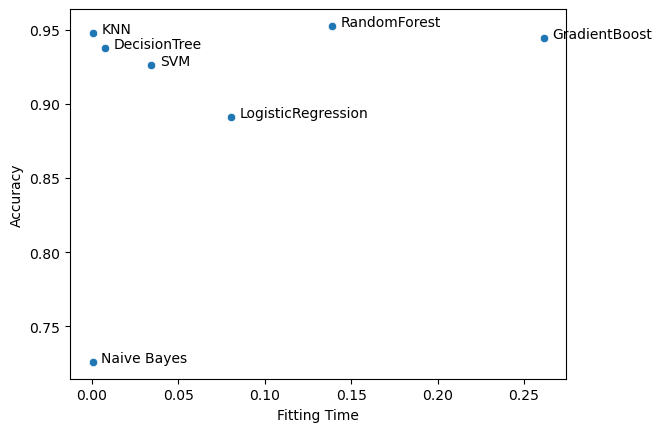

In [162]:
### visualize the prediction 

ax = sns.scatterplot(x="Fitting Time", y="Accuracy", data=results)
for x, y, model_name in results[['Fitting Time', 'Accuracy', 'Model']].values:
    ax.text(x+.005, y, model_name)

As we can see, the best model is the Random Forest model. We can either choose to
1. fine tune the best model to get the best prediction result. 
2. use a set of best model to generate an ensamble model for prediction. 

### Next Step 1: Fine Tune the Best Model 

In [ ]:
from sklearn.model_selection import GridSearchCV    ## use cross validation to search for best model hyper-parameters 

# Define model
rf = RandomForestClassifier()

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 15],
    'criterion': ['gini', 'entropy'],
}

In [ ]:
# Perform grid search
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X, Y)

# Print best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

- As we can see, the fine tuned RF model is 0.004 higher in accuracy than the RF model with default parameters. 

### Next Step 2: General Ensembled Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier

rf = RandomForestClassifier()
knn = KNeighborsClassifier()
gb = GradientBoostingClassifier()
tree = DecisionTreeClassifier()

vc = VotingClassifier(estimators=[("RandomForest", rf), 
                                  ("KNN", knn), 
                                  ("GradientBoost", gb), 
                                  ("DecisionTree", tree)], 
                                  voting="soft", weights=[3,1,1,1])

scores = cross_validate(estimator=vc, X=X, y=Y, cv=5, scoring="accuracy")

print("Average Fitting Time:", scores['fit_time'].mean())
print("Average Accuracy:", scores['test_score'].mean())

- The generalized ensamble model is also 0.002 higher in accuracy than the RF model with default parameters. 

## Apply the Best Model to Improve Customer Retention

- Since the fine turned RF model yields the best performance, we will apply it to predict the churn for next year's customers. 

In [ ]:
## Apply the same data preprocessing to the next year's data 

features = ['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
            'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
            'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Customer Value']   # features / independent variables 
target = ['Churn']     # target / dependent variable 

# extract corresponding columns 
X2 = next_year[features].values   
Y2 = next_year[target].values.ravel()

## standardize features 
X2 = StandardScaler().fit_transform(X2)

## Practice 3: 
- Use the best fit Random Forest Classifier to predict churn of the next year's observations and save your prediction in a variable `y_pred`. 

In [167]:
## your code here 
# Assuming next_year is the data for the upcoming year
X_next_year = next_year[features].values
X_next_year = StandardScaler().fit_transform(X_next_year)

# Fit Random Forest on the full dataset
rf.fit(X, Y)

# Predict churn for next year's customers
y_pred = rf.predict(X_next_year)

# Add predictions to the dataset
next_year['pred_churn'] = y_pred

# Sort customers based on predicted churn and customer value (high-value customers prioritized)
high_risk_customers = next_year[next_year['pred_churn'] == 1].sort_values(by='Customer Value', ascending=False)
print(high_risk_customers.head(10))


      Call  Failure  Complains  Subscription  Length  Charge  Amount  \
177              10          1                    40               0   
1927             10          1                    35               0   
2877             12          0                    33               0   
876              15          1                    36               0   
2461             16          1                    43               0   
2777             16          1                    38               0   
2927             16          1                    43               0   
2922             30          1                    40               0   
126               6          0                    33               0   
2527             12          0                    35               0   

      Seconds of Use  Frequency of use  Frequency of SMS  \
177             2348                46                44   
1927            2673                49                35   
2877            2573       

In [169]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0])

In [171]:
next_year['pred_churn'] = y_pred  # map the prediction back to the dataset 

In [173]:
## sort customer based on churn and their customer value 
mask = next_year['pred_churn'] == 1
next_year[mask].sort_values(["pred_churn", "Customer Value"], ascending=False).head(10)

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Customer Value,Churn,pred_churn
177,10,1,40,0,2348,46,44,35,3,1,2,271.760,1,1
1927,10,1,35,0,2673,49,35,29,3,1,2,248.880,1,1
2877,12,0,33,0,2573,44,33,32,3,1,2,236.680,1,1
876,15,1,36,0,3700,52,17,16,3,1,2,218.080,1,1
2461,16,1,43,0,2723,68,26,24,3,1,2,215.640,0,1
2777,16,1,38,0,2763,51,50,36,4,1,2,195.350,1,1
2927,16,1,43,0,2573,56,49,34,4,1,2,188.225,1,1
2922,30,1,40,0,1260,59,31,20,3,1,2,176.760,1,1
126,6,0,33,0,2930,38,4,14,2,1,2,151.560,1,1
2527,12,0,35,0,2393,42,30,28,4,1,2,135.875,1,1


- Then, as data scientist, you can ask the customer service department to call these customers who are likely to leave to improve their retetion. 
- The call can take turn based on the customer value, in which high value customers get higher priority. 

## Machine Learning For Explainatory Purposes 

## Solution 1: Use Linear/Logistic Regressions 

In [175]:
import statsmodels.api as sm 

In [177]:
features = ['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
            'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
            'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Customer Value']   # features / independent variables 
target = ['Churn']     # target / dependent variable 

# extract corresponding columns 
X3 = data[features]  
Y3 = data[target]

## standardize features 
X3 = pd.DataFrame(StandardScaler().fit_transform(X3), columns=X3.columns)   ## we need to standardize all the features to make the coefficient compariable 
X3['constant'] = 1

In [179]:
logit_model = sm.Logit(Y3, X3)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.219861
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 3150
Model:                          Logit   Df Residuals:                     3137
Method:                           MLE   Df Model:                           12
Date:                Sun, 06 Oct 2024   Pseudo R-squ.:                  0.4945
Time:                        18:41:53   Log-Likelihood:                -692.56
converged:                       True   LL-Null:                       -1369.9
Covariance Type:            nonrobust   LLR p-value:                7.893e-283
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Call  Failure               0.9540      0.129      7.394      0.000       0.701       1.207
Complains                   1.0745      0.075     14.320      0.000       0.927       1.222
Subscription  Length       -0.2567      0.082     -3.149      0.002      -0.416      -0.097
Charge  Amount             -0.6318      0.183     -3.448      0.001      -0.991      -0.273
Seconds of Use              0.4704      0.595      0.790      0.429      -0.696       1.637
Frequency of use           -3.1744      0.487     -6.518      0.000      -4.129      -2.220
Frequency of SMS           -5.2513      1.365     -3.848      0.000      -7.926      -2.577
Distinct Called Numbers    -0.1907      0.166     -1.150      0.250      -0.516       0.134
Age Group                   0.1067      0.099      1.077      0.281      -0.087       0.301
Tariff Plan                 0.0643      0.169      0.381      0.703      -0.266       0.395
Status                      0.6085      0.087      7.013      0.000       0.438       0.779
Customer Value              4.2351      1.449      2.922      0.003       1.395       7.076
constant                   -3.5025      0.186    -18.803      0.000      -3.868      -3.137
===========================================================================================
"""

## Use Permutation feature importance

The `permutation feature importance` is defined to be the decrease in a model score when a single feature value is randomly shuffled. This procedure breaks the relationship between the feature and the target, thus the drop in the model score is indicative of how much the model depends on the feature.

In [181]:
from sklearn.inspection import permutation_importance

rf = RandomForestClassifier(class_weight = 'balanced_subsample', 
                            criterion= 'entropy', 
                            max_depth= None, 
                            n_estimators = 500)
rf.fit(X, Y)

results = permutation_importance(rf, X, Y, n_repeats=10)

In [182]:
results

{'importances_mean': array([0.01938983, 0.04749153, 0.03677966, 0.00074576, 0.03891525,
        0.05755932, 0.01169492, 0.03057627, 0.02183051, 0.        ,
        0.06040678, 0.02569492]),
 'importances_std': array([0.00191037, 0.00200803, 0.00389241, 0.0004982 , 0.00227296,
        0.00225774, 0.00173677, 0.00256286, 0.00145565, 0.        ,
        0.00184924, 0.00199281]),
 'importances': array([[0.02169492, 0.02067797, 0.0179661 , 0.01728814, 0.02067797,
         0.01966102, 0.0179661 , 0.0220339 , 0.0159322 , 0.02      ],
        [0.05220339, 0.04644068, 0.04847458, 0.04644068, 0.04779661,
         0.04372881, 0.04711864, 0.04813559, 0.04745763, 0.04711864],
        [0.0359322 , 0.03389831, 0.03694915, 0.04      , 0.03254237,
         0.0359322 , 0.03457627, 0.03389831, 0.03728814, 0.04677966],
        [0.00135593, 0.00033898, 0.        , 0.00135593, 0.00135593,
         0.00067797, 0.00067797, 0.        , 0.00067797, 0.00101695],
        [0.03830508, 0.0359322 , 0.03898305, 0.037

In [187]:
## rearrange the results as dataframe
results2 = pd.DataFrame({"Feature Importance": results['importances_mean'], 
                       "STD": results['importances_std']}, index=features)
results2.sort_values("Feature Importance", inplace=True, ascending=False)
results2

,Feature Importance,STD
Status,0.060407,0.001849
Frequency of use,0.057559,0.002258
Complains,0.047492,0.002008
Seconds of Use,0.038915,0.002273
Subscription Length,0.036780,0.003892
Distinct Called Numbers,0.030576,0.002563
Customer Value,0.025695,0.001993
Age Group,0.021831,0.001456
Call Failure,0.019390,0.001910
Frequency of SMS,0.011695,0.001737


## Practice 4. 
- Generate a horizontal bar plot to show the feature importance of different features in determining the customer churn. 

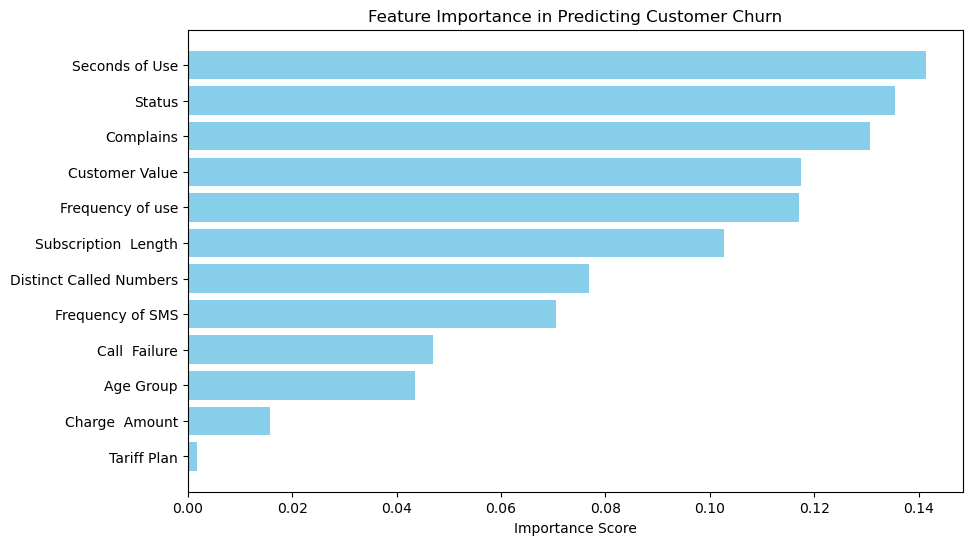

In [189]:
# your code here 
# Get the feature importances
importances = rf.feature_importances_

# Create a DataFrame to hold feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance using a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance in Predicting Customer Churn')
plt.gca().invert_yaxis()  # Invert the y-axis to have the most important feature at the top
plt.show()